In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline 

In [48]:
import os

DATASET = 'dataset/Edge-IIoTset-dataset'

for path, dirs, files in os.walk(DATASET):
    for file in files:
        if file.endswith('csv'):
            print(f'{path}/{file}')

dataset/Edge-IIoTset-dataset/Attack traffic/Backdoor_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/DDoS_HTTP_Flood_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/DDoS_ICMP_Flood_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/DDoS_TCP_SYN_Flood_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/DDoS_UDP_Flood_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/MITM_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/OS_Fingerprinting_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Password_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Port_Scanning_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Ransomware_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/SQL_injection_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Uploading_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Vulnerability_scanner_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/XSS_attack.csv
dataset/Edge-IIoTset-dataset/Normal traffic/Dist

``` bash
#!/bin/bash

# Find all files with a ".csv" extension in the current directory and its subdirectories
find ./ -type f -name "*.csv" | while read file; do
    # Count the number of lines in each file
    lines=$(wc -l < "$file")
    # Print the file path and its line count
    echo "$file has $lines lines"
done
```

```
./Attack traffic/Backdoor_attack.csv has 24863 lines
./Attack traffic/DDoS_HTTP_Flood_attack.csv has 229023 lines
./Attack traffic/DDoS_ICMP_Flood_attack.csv has 2914355 lines
./Attack traffic/DDoS_TCP_SYN_Flood_attack.csv has 2020121 lines
./Attack traffic/DDoS_UDP_Flood_attack.csv has 3201627 lines
./Attack traffic/MITM_attack.csv has 1230 lines
./Attack traffic/OS_Fingerprinting_attack.csv has 1002 lines
./Attack traffic/Password_attack.csv has 1053386 lines
./Attack traffic/Port_Scanning_attack.csv has 22565 lines
./Attack traffic/Ransomware_attack.csv has 10926 lines
./Attack traffic/SQL_injection_attack.csv has 51204 lines
./Attack traffic/Uploading_attack.csv has 37635 lines
./Attack traffic/Vulnerability_scanner_attack.csv has 145870 lines
./Attack traffic/XSS_attack.csv has 15916 lines
./Normal traffic/Distance/Distance.csv has 1143541 lines
./Normal traffic/Flame_Sensor/Flame_Sensor.csv has 1070197 lines
./Normal traffic/Heart_Rate/Heart_Rate.csv has 165320 lines
./Normal traffic/IR_Receiver/IR_Receiver.csv has 1307779 lines
./Normal traffic/Modbus/Modbus.csv has 159503 lines
./Normal traffic/phValue/phValue.csv has 746909 lines
./Normal traffic/Soil_Moisture/Soil_Moisture.csv has 1192778 lines
./Normal traffic/Sound_Sensor/Sound_Sensor.csv has 1512884 lines
./Normal traffic/Temperature_and_Humidity/Temperature_and_Humidity.csv has 1615723 lines
./Normal traffic/Water_Level/Water_Level.csv has 2295289 lines
./Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv has 2219202 lines
./Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv has 157801 lines
```

ML-EdgeIIoT-dataset

In [49]:
df  = pd.read_csv('./dataset/Edge-IIoTset-dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv', low_memory=False)
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 157800 non-null  object 
 1   ip.src_host                157800 non-null  object 
 2   ip.dst_host                157800 non-null  object 
 3   arp.dst.proto_ipv4         157800 non-null  object 
 4   arp.opcode                 157800 non-null  float64
 5   arp.hw.size                157800 non-null  float64
 6   arp.src.proto_ipv4         157800 non-null  object 
 7   icmp.checksum              157800 non-null  float64
 8   icmp.seq_le                157800 non-null  float64
 9   icmp.transmit_timestamp    157800 non-null  float64
 10  icmp.unused                157800 non-null  float64
 11  http.file_data             157800 non-null  object 
 12  http.content_length        157800 non-null  float64
 13  http.request.uri.query     15

In [51]:
print(df['Attack_type'].value_counts())

Attack_type
Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: count, dtype: int64


In [52]:
from sklearn.utils import shuffle

drop_columns = ['frame.time', 
                'ip.src_host', 
                'ip.dst_host', 
                'arp.src.proto_ipv4',
                'arp.dst.proto_ipv4', 
                'http.file_data',
                'http.request.full_uri',
                'icmp.transmit_timestamp',
                'http.request.uri.query', 
                'tcp.options',
                'tcp.payload',
                'tcp.srcport',
                'tcp.dstport', 
                'udp.port', 
                'mqtt.msg']

df.drop(drop_columns, axis=1, inplace=True)
print(f'> NA: {df.isnull().sum().sum()}, DUPS: {df.duplicated().sum()}', )

df.dropna(axis=0, how='any', inplace=True)
print(f'> NA: {df.isnull().sum().sum()}, DUPS: {df.duplicated().sum()}', )

df.drop_duplicates(subset=None, keep='first', inplace=True)
print(f'> NA: {df.isnull().sum().sum()}, DUPS: {df.duplicated().sum()}', )




df = shuffle(df)

df.isna().sum()

print(df['Attack_type'].value_counts())

> NA: 0, DUPS: 5604
> NA: 0, DUPS: 5604
> NA: 0, DUPS: 0
Attack_type
Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: count, dtype: int64


In [53]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')
encode_text_dummy(df,'http.referer')
encode_text_dummy(df,"http.request.version")
encode_text_dummy(df,"dns.qry.name.len")
encode_text_dummy(df,"mqtt.conack.flags")
encode_text_dummy(df,"mqtt.protoname")
encode_text_dummy(df,"mqtt.topic")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152196 entries, 154474 to 23036
Data columns (total 76 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   arp.opcode                                                                         152196 non-null  float64
 1   arp.hw.size                                                                        152196 non-null  float64
 2   icmp.checksum                                                                      152196 non-null  float64
 3   icmp.seq_le                                                                        152196 non-null  float64
 4   icmp.unused                                                                        152196 non-null  float64
 5   http.content_length                                                                152196 non-

In [210]:


from sklearn.model_selection import train_test_split
#from sklearn.model_selection import StratifiedShuffleSplit

# 39  Attack_label                                                                       152196 non-null  int64  
# 40  Attack_type                                                                        152196 non-null  object 

SEED = random.randint(0, 42424242)
print(f'SEED = {SEED}')

target_label_2_class = 'Attack_label' # 0 indicates normal and 1 indicates attacks
target_label_15_class = 'Attack_type'
target_label_15_class_cat = 'Attack_type_cat'

# df[target_label_15_class_cat], Attack_type_classes = pd.factorize(df[target_label_15_class])
df[target_label_15_class_cat] = df[target_label_15_class].astype('category')

Y = df[target_label_2_class]

X = df.drop([target_label_2_class, target_label_15_class, target_label_15_class_cat], axis=1, inplace=False)

print(f'X: {X.shape}')
print(f'Y: {Y.shape}')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=SEED, stratify=Y)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')

print(f'Y_train: {Y_train.shape}')
print(f'Y_test: {Y_test.shape}')



SEED = 6590674
X: (152196, 74)
Y: (152196,)
X_train: (91317, 74)
X_test: (60879, 74)
Y_train: (91317,)
Y_test: (60879,)


In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  classification_report
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=SEED)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=6590674)

In [213]:


predicted = clf.predict(X_test)
accuracy = accuracy_score(predicted, Y_test)
print(f'Accuracy: {accuracy}')

print(classification_report(Y_test, predicted))

for imp, col in zip(clf.feature_importances_, X_train.columns):
    if imp > 0:
        print(imp, col)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9640
           1       1.00      1.00      1.00     51239

    accuracy                           1.00     60879
   macro avg       1.00      1.00      1.00     60879
weighted avg       1.00      1.00      1.00     60879

1.0 mqtt.topic-0.0


15 classes

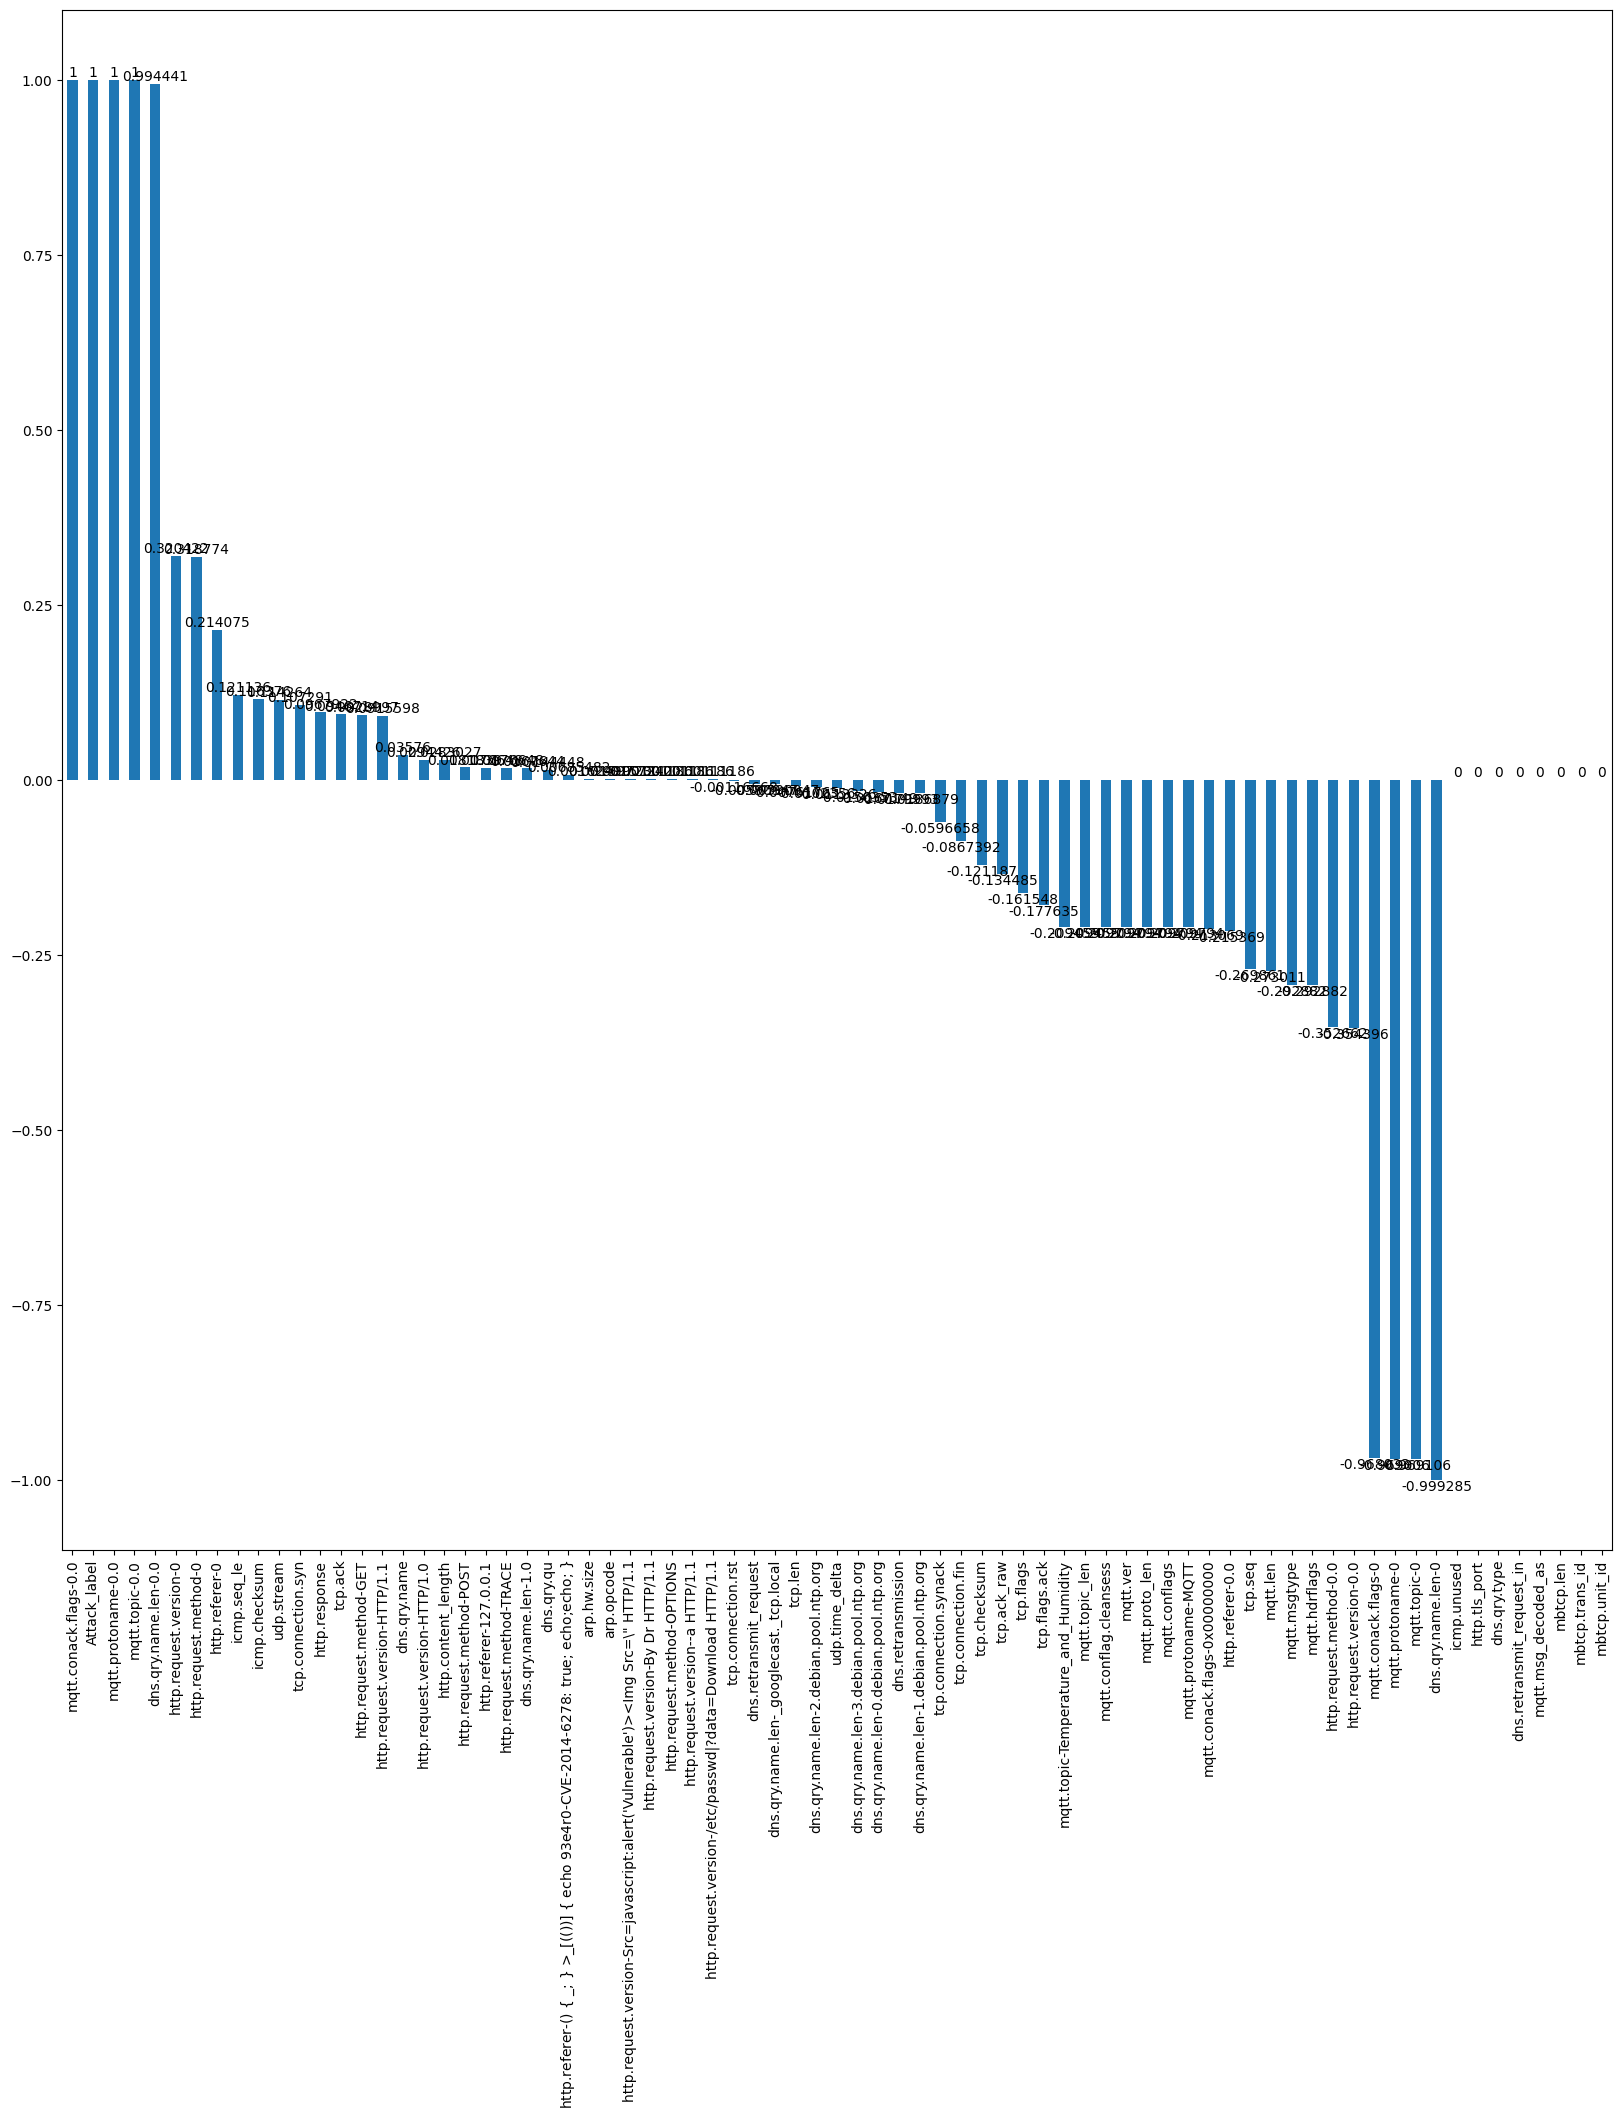

In [230]:

tdf = df.drop([target_label_15_class, target_label_15_class_cat], axis=1, inplace=False).copy()
# # df[target_label_15_class_cat], Attack_type_classes = pd.factorize(df[target_label_15_class])
# tdf['attack-type'], Attack_type_classes = pd.factorize(df[target_label_15_class])


corr = tdf.corr()
corr = corr[target_label_2_class]

corr = corr.sort_values(ascending=False)

ax = corr.plot.bar(figsize=(20, 20))
ax.bar_label(ax.containers[0])

plt.xticks(rotation=90)
plt.show()


In [198]:

Y = df[target_label_15_class_cat]
X = df.drop([target_label_2_class, target_label_15_class, target_label_15_class_cat], axis=1, inplace=False)

print(f'X: {X.shape}')
print(f'Y: {Y.shape}')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=SEED, stratify=Y)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')

print(f'Y_train: {Y_train.shape}')
print(f'Y_test: {Y_test.shape}')


X: (152196, 74)
Y: (152196,)
X_train: (91317, 74)
X_test: (60879, 74)
Y_train: (91317,)
Y_test: (60879,)


In [234]:
X_test.columns

Index(['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le',
       'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port',
       'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type',
       'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags',
       'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len',
       'mbtcp.trans_id', 'mbtcp.unit_id', 'http.request.method-0',
       'http.request.method-0.0', 'http.request.method-GET',
       'http.request.method-OPTIONS', 'http.request.method-POST',
       'http.request.method-TRACE',
       'http.referer-() { _; } >_[$($())] { echo 93e4r0

In [199]:
clf = DecisionTreeClassifier(random_state=SEED)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=5284146)

In [201]:
predicted = clf.predict(X_test)
accuracy = accuracy_score(predicted, Y_test)
print(f'Accuracy: {accuracy}')

print(classification_report(Y_test, predicted))

for imp, col in sorted(zip(clf.feature_importances_, X_train.columns), key=lambda x: x[0], reverse=True):
    if imp > 0:
        print(f'{imp:.5f}, {col}')


Accuracy: 0.9335567272787004
                       precision    recall  f1-score   support

             Backdoor       0.95      0.94      0.95      3946
            DDoS_HTTP       0.89      0.89      0.89      4198
            DDoS_ICMP       1.00      1.00      1.00      5238
             DDoS_TCP       1.00      1.00      1.00      4099
             DDoS_UDP       1.00      1.00      1.00      5799
       Fingerprinting       0.67      0.74      0.70       341
                 MITM       1.00      1.00      1.00       143
               Normal       1.00      1.00      1.00      9641
             Password       0.81      0.81      0.81      3989
        Port_Scanning       0.94      0.94      0.94      3568
           Ransomware       0.93      0.94      0.93      3876
        SQL_injection       0.83      0.82      0.82      4113
            Uploading       0.81      0.82      0.82      4086
Vulnerability_scanner       0.96      0.96      0.96      4025
                  XSS    

In [157]:



# from sklearn.metrics import ConfusionMatrixDisplay

# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]


# plt.figure(figsize=(1600, 1600)) 

# for title, normalize in titles_options:
#     disp = ConfusionMatrixDisplay.from_estimator(
#         clf,
#         X_test,
#         Y_test,
#         # display_labels=Attack_type_classes,
#         cmap=plt.cm.Blues,
#         normalize=normalize,
#     )
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.xticks(rotation=90)
# plt.show()

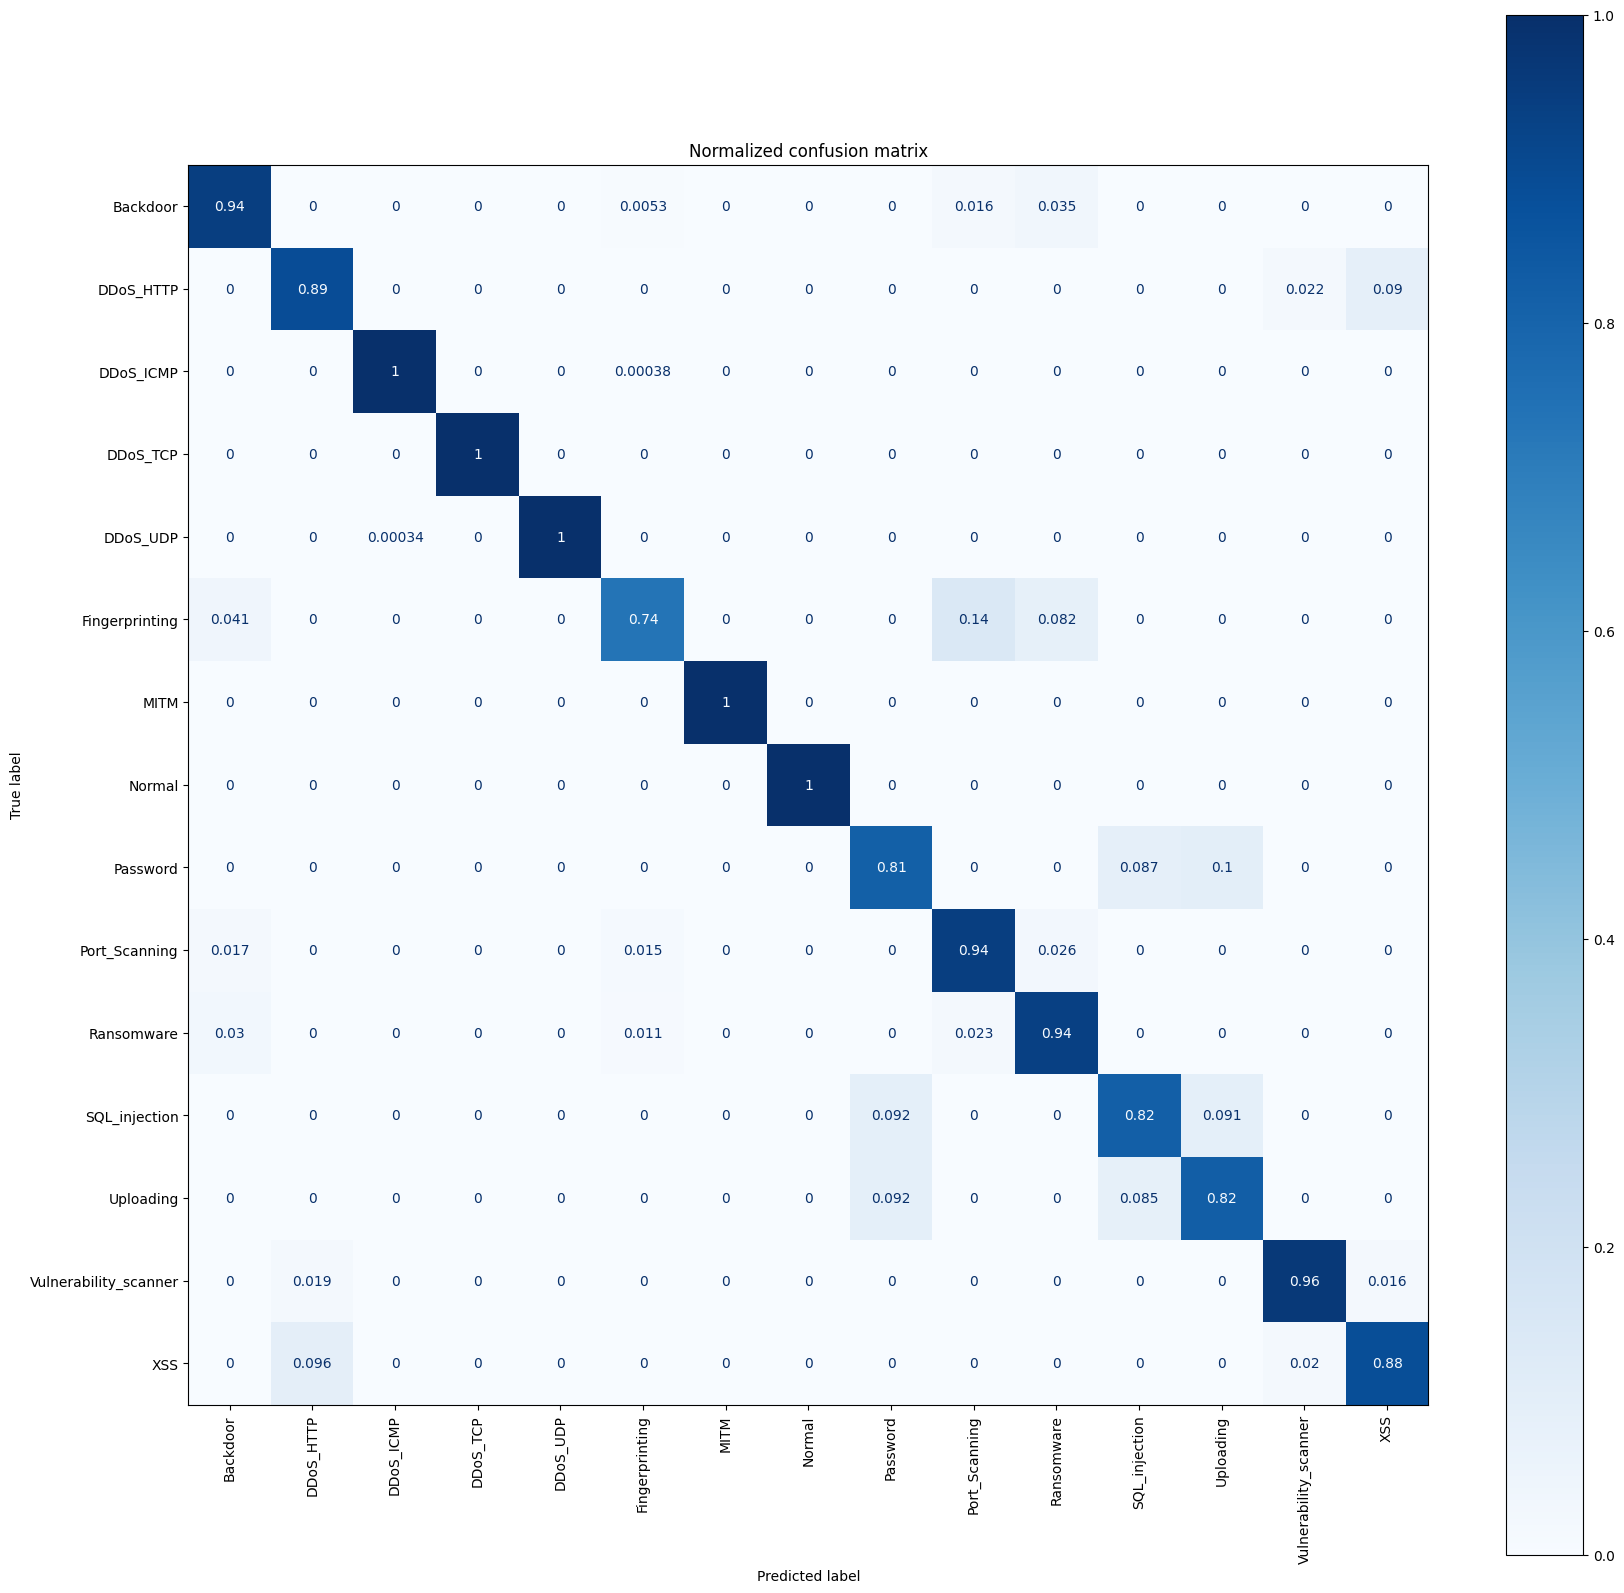

In [202]:

from sklearn.metrics import ConfusionMatrixDisplay

# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]

title='Normalized confusion matrix'

disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    Y_test,
    # display_labels=Attack_type_classes,
    cmap=plt.cm.Blues,
    normalize='true',
)
disp.ax_.set_title(title)
disp.figure_.set_size_inches(20, 20, forward=True)
plt.xticks(rotation=90)
plt.show()

In [177]:

# tdf = df.drop([target_label_15_class, target_label_15_class_cat, target_label_2_class], axis=1, inplace=False).copy()
# # print(tdf.head())
# # df[target_label_15_class_cat], Attack_type_classes = pd.factorize(df[target_label_15_class])
# tdf['attack-type'], Attack_type_classes = pd.factorize(df[target_label_15_class])


# corr = tdf.corr()

# mask = np.triu(np.ones_like(corr, dtype=bool))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})





